## Importing Libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Test Set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

## Loading Model

In [3]:
cnn = tf.keras.models.load_model('plant_disease_trained_model.keras')

## Performing Prediction on Single image

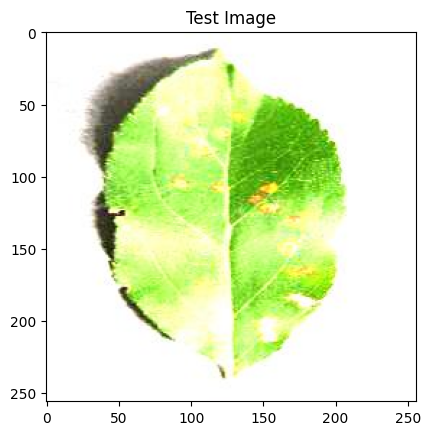

In [4]:
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.title('Test Image')
plt.imshow(img)
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 2s 2s/step


In [6]:
print(predictions)

[[3.09364859e-14 1.78408581e-17 1.00000000e+00 1.55615454e-17
  2.79810592e-14 4.60027936e-12 1.87569954e-17 1.68471346e-14
  2.75402754e-17 8.45444430e-17 4.00441931e-21 2.70012521e-14
  5.10672640e-14 9.26265256e-15 2.44454582e-16 2.08214505e-11
  7.29565551e-13 1.01589689e-19 1.85917443e-15 2.44195496e-16
  3.54497805e-18 4.43877716e-16 5.17210388e-16 5.75166542e-14
  1.02327163e-18 4.98437001e-17 7.50000400e-16 2.51949851e-17
  8.38764388e-13 1.09304045e-14 4.14286747e-12 1.30906017e-16
  4.15022150e-09 1.31072419e-16 2.84113038e-13 1.49248730e-15
  8.08507094e-15 1.01508979e-14]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


In [8]:
model_prediction = class_name[result_index]
print("Predicted result :",model_prediction)

Predicted result : Apple___Cedar_apple_rust


In [9]:
def single_prediction(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256, 256))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = cnn.predict(input_arr)
    result_index = np.argmax(predictions) #Return index of max element
    model_prediction = class_name[result_index]
    print("Predicted result :",model_prediction)

In [10]:
single_prediction("test/test/AppleCedarRust1.JPG")

1/1 [==============================] - 0s 124ms/step
Predicted result : Apple___Cedar_apple_rust


In [11]:
single_prediction("test/test/AppleScab2.JPG")

1/1 [==============================] - 0s 121ms/step
Predicted result : Apple___Apple_scab


In [12]:
single_prediction("test/test/AppleScab3.JPG")

1/1 [==============================] - 0s 112ms/step
Predicted result : Potato___Early_blight


In [13]:
single_prediction("test/test/PotatoHealthy1.JPG")

1/1 [==============================] - 0s 111ms/step
Predicted result : Potato___healthy
